In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)  # 상위 1000개 rank된 단어만 가져옴
# oov_char: Out Of Vocabulary

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
np.max(y_train)

45

In [4]:
X_train.shape

(8982,)

In [5]:
X_test.shape

(2246,)

In [7]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [8]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape

(8982, 46)

In [11]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
model = models.Sequential()
model.add(layers.Embedding(1000, 100))
model.add(layers.LSTM(100, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


((100 + 100): 입력) x (100: 출력) + 100 = 20100  
20100 x 4 = 80400

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [14]:
history = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/200
450/450 [==============================] - 23s 46ms/step - loss: 2.2237 - accuracy: 0.4405 - val_loss: 1.9457 - val_accuracy: 0.5147
Epoch 2/200
450/450 [==============================] - 18s 39ms/step - loss: 1.7724 - accuracy: 0.5485 - val_loss: 1.6909 - val_accuracy: 0.5766
Epoch 3/200
450/450 [==============================] - 17s 39ms/step - loss: 1.5822 - accuracy: 0.5944 - val_loss: 1.5789 - val_accuracy: 0.6011
Epoch 4/200
450/450 [==============================] - 18s 39ms/step - loss: 1.4232 - accuracy: 0.6338 - val_loss: 1.4059 - val_accuracy: 0.6354
Epoch 5/200
450/450 [==============================] - 17s 39ms/step - loss: 1.2432 - accuracy: 0.6801 - val_loss: 1.3204 - val_accuracy: 0.6692
Epoch 6/200
450/450 [==============================] - 18s 39ms/step - loss: 1.1234 - accuracy: 0.7108 - val_loss: 1.2303 - val_accuracy: 0.6870
Epoch 7/200
450/450 [==============================] - 18s 39ms/step - loss: 1.0227 - accuracy: 0.7425 - val_loss: 1.1833 - val_ac

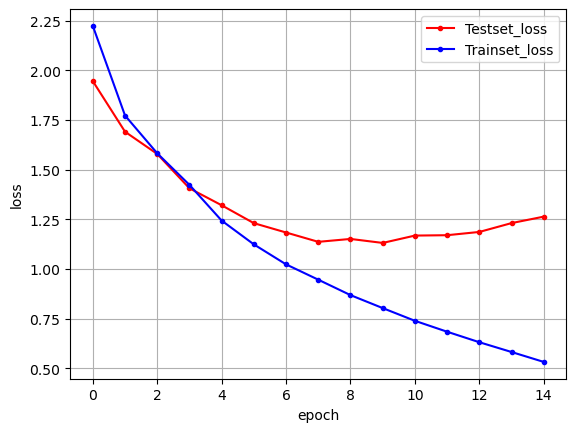

In [16]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()